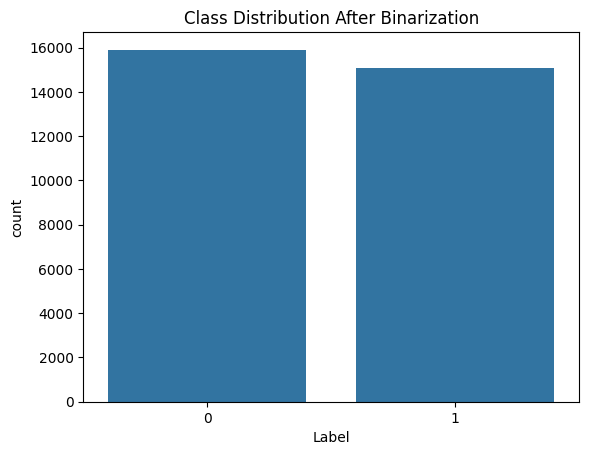

Model Accuracy: 0.92
Confusion Matrix:
 [[2923  247]
 [ 253 2777]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      3170
           1       0.92      0.92      0.92      3030

    accuracy                           0.92      6200
   macro avg       0.92      0.92      0.92      6200
weighted avg       0.92      0.92      0.92      6200



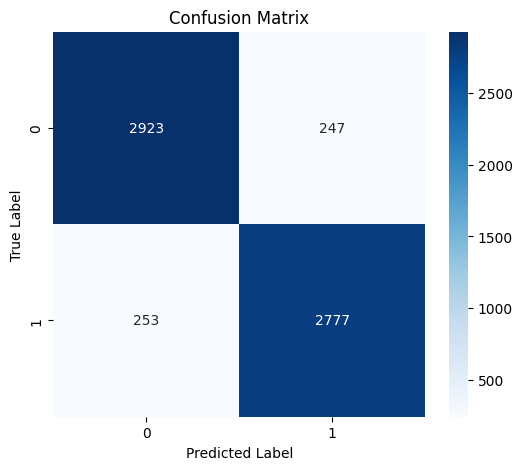

<ipython-input-8-1737a7d288e6>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=np.array(X.columns)[sorted_idx][:10], x=perm_importance.importances_mean[sorted_idx][:10], palette='viridis')


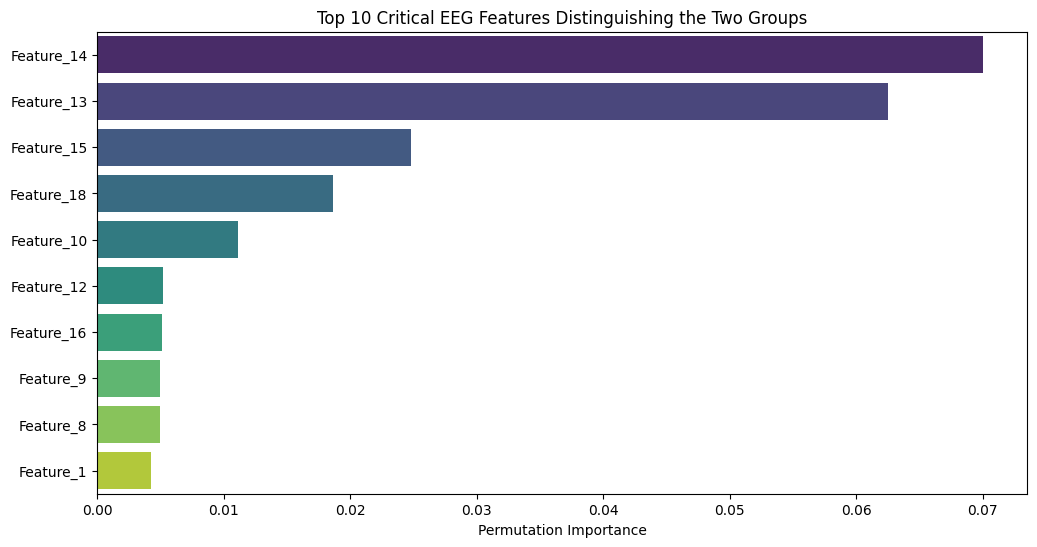

Most important EEG features:
Feature_14: 0.07001612903225804
Feature_13: 0.062483870967741904
Feature_15: 0.02479032258064511
Feature_18: 0.01866129032258059
Feature_10: 0.011112903225806414
Feature_12: 0.005177419354838686
Feature_16: 0.005129032258064492
Feature_9: 0.004951612903225789
Feature_8: 0.004935483870967705
Feature_1: 0.004225806451612868


In [8]:
import pandas as pd  # For data handling
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For enhanced visualizations
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.ensemble import RandomForestClassifier  # ML Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics
from sklearn.inspection import permutation_importance  # Feature importance

# Load the EEG Dataset
file_path = "s00.csv"  # Path to the dataset file
df = pd.read_csv(file_path)  # Load CSV file into a DataFrame

# Rename Columns (to avoid issues with numerical names)
df.columns = [f'Feature_{i+1}' for i in range(df.shape[1])]

# Assume last column is the target (convert to binary classification)
df.rename(columns={df.columns[-1]: "Label"}, inplace=True)

# Convert Label to Binary Classification (Above median -> 1, Below median -> 0)
median_value = df['Label'].median()
df['Label'] = (df['Label'] > median_value).astype(int)

# Check Data Balance
sns.countplot(x=df['Label'])
plt.title("Class Distribution After Binarization")
plt.show()

# Separate Features and Target Variable
X = df.drop(columns=['Label'])  # EEG signals (features)
y = df['Label']  # Labels (target)

# Normalize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier Model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Results
print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance Analysis using Permutation Importance
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(y=np.array(X.columns)[sorted_idx][:10], x=perm_importance.importances_mean[sorted_idx][:10], palette='viridis')
plt.xlabel('Permutation Importance')
plt.title('Top 10 Critical EEG Features Distinguishing the Two Groups')
plt.show()

# Display the most important features
print("Most important EEG features:")
for feature, importance in zip(np.array(X.columns)[sorted_idx][:10], perm_importance.importances_mean[sorted_idx][:10]):
    print(f"{feature}: {importance}")
